In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [2]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2020", "DEN")
print(data.head())
one_match = extract_one_match(data, 1)


   frame_team  Time [s]_team half_team  home_1_x  home_1_y  home_3_x  \
0           0           0.00        1H     52.49     -0.08     19.96   
1           1           0.04        1H     52.51     -0.06     19.95   
2           2           0.08        1H     52.53     -0.05     19.95   
3           3           0.12        1H     52.51     -0.06     19.94   
4           4           0.16        1H     52.51     -0.05     19.94   

   home_3_y  home_4_x  home_4_y  home_5_x  ...  away_19_y  away_22_x  \
0      0.13     21.84     10.54     18.66  ...        NaN      -0.41   
1      0.14     21.87     10.56     18.68  ...        NaN      -0.40   
2      0.15     21.89     10.57     18.70  ...        NaN      -0.34   
3      0.16     21.90     10.58     18.73  ...        NaN      -0.29   
4      0.17     21.92     10.59     18.76  ...        NaN      -0.23   

   away_22_y  away_23_x  away_23_y  away_26_x  away_26_y  ball_x  ball_y  \
0      28.75      -0.43      33.28        NaN        NaN  

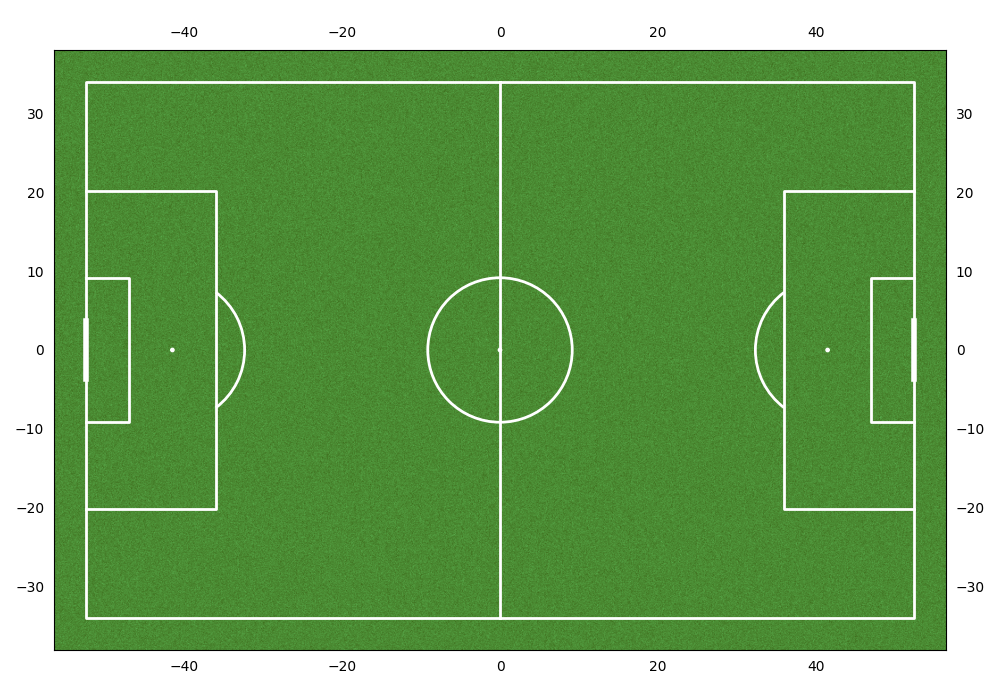

Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (np.float64(0.8024166820502927), np.float64(1.2247827400881377))
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
{'home_1_x': np.float64(41.47228089034729), 'home_1_y': np.float64(0.5912957586504888), 'home_2_x': np.float64(31.589883979919975), 'home_2_y': np.float64(14.021219765128627), 'home_3_x': np.float64(32.47676575393268), 'home_3_y': np.float64(2.1116645141008448), 'home_4_x': np.float64(32.09667356507009), 'home_4_y': np.float64(-10.938167303514703), 'home_5_x': np.float64(22.467671447217853), 'home_5_y': np.float64(25.930775016156403), 'home_6_x': np.float64(22.721066239792904), 'home_6_y': np.float64(12.374153613390739), 'home_7_x': np.float64(25.63510635440609), 'home_7_y': np.float64(-2.9562313374003395), 'home_8_x': np.float64(26.01519854326868), 'home_8_y': np.float64(-16.132760551303413), 'home_9_x

c:\Users\Ericd\OneDrive\Dokumenter\GitHub\Thesis_V1\libs\InteractivePitchUI.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  "function_2": lambda x: 1 / x,


inf
inf
     home_1_x  home_1_y  home_3_x  home_3_y  home_4_x  home_4_y  home_5_x  \
0       52.49     -0.08     19.96      0.13     21.84     10.54     18.66   
48      50.37     -0.04     20.69      1.24     23.05     11.38     19.61   
96      46.46      0.56     23.50      2.86     25.62     13.02     22.20   
144     46.25      1.67     28.86      4.68     31.46     14.18     26.25   
192     46.75      1.71     30.54      5.99     33.72     16.36     28.53   

     home_5_y  home_6_x  home_6_y  ...  home_14_x  home_14_y  home_18_x  \
0      -11.94     22.73     17.44  ...      -0.12     -10.64      21.63   
48     -11.80     23.28     18.55  ...      -9.14      -7.14      21.58   
96     -10.39     27.83     19.78  ...      -8.15      -3.92      25.77   
144     -8.52     29.57     25.08  ...      -0.62      -2.38      33.56   
192     -6.39     29.63     27.63  ...       6.92      -0.99      35.22   

     home_18_y  home_20_x  home_20_y  home_23_x  home_23_y  ball_x_team  \
0  

In [3]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [4]:
print(interactive_pitch.situations[0])

{'points': [(np.float64(40.205306927471995), np.float64(0.33790096607543063)), (np.float64(33.11025273537034), np.float64(11.613969235665564)), (np.float64(32.60346315022022), np.float64(3.1252436844010774)), (np.float64(31.969976168782566), np.float64(-5.870271452013519)), (np.float64(20.440513106617374), np.float64(26.310867205018994)), (np.float64(21.834184465780197), np.float64(14.021219765128627)), (np.float64(21.70748706949267), np.float64(-0.5489808079372764)), (np.float64(23.22785582494302), np.float64(-14.485694399565531)), (np.float64(10.55811619619007), np.float64(-20.82056421394201)), (np.float64(7.644076081576884), np.float64(3.25194108068861)), (np.float64(6.250404722414061), np.float64(18.96241822034228))], 'vectors': [], 'ball': (np.float64(1.1825088709128835), np.float64(2.871848891826019))}
